<a href="https://colab.research.google.com/github/subhra004/subhra004/blob/main/Estimated_resident_population_ACT_AUSTRALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv('Estimated_resident_population_ACT.csv')

In [ ]:
df.head()

,ERPYear,SexCode,AgeGroup5Code,"Australian Statistical Geography Standard, Statistical Area",EntityCode,EntityName,StateCode,ERPCount
0,2001,Male,40-44,SA3,80101,Belconnen,8,2974
1,2002,Male,40-44,SA3,80101,Belconnen,8,2986
2,2003,Male,40-44,SA3,80101,Belconnen,8,2969
3,2004,Male,40-44,SA3,80101,Belconnen,8,2883
4,2005,Male,40-44,SA3,80101,Belconnen,8,2820


In [ ]:
# Display basic info about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151848 entries, 0 to 151847
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   ERPYear                                                      151848 non-null  int64 
 1   SexCode                                                      151848 non-null  object
 2   AgeGroup5Code                                                151848 non-null  object
 3   Australian Statistical Geography Standard, Statistical Area  151848 non-null  object
 4   EntityCode                                                   151848 non-null  int64 
 5   EntityName                                                   151848 non-null  object
 6   StateCode                                                    151848 non-null  int64 
 7   ERPCount                                              

In [ ]:
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   ERPYear SexCode AgeGroup5Code  \
0     2001    Male         40-44   
1     2002    Male         40-44   
2     2003    Male         40-44   
3     2004    Male         40-44   
4     2005    Male         40-44   

  Australian Statistical Geography Standard, Statistical Area  EntityCode  \
0                                                SA3                80101   
1                                                SA3                80101   
2                                                SA3                80101   
3                                                SA3                80101   
4                                                SA3                80101   

  EntityName  StateCode  ERPCount  
0  Belconnen          8      2974  
1  Belconnen          8      2986  
2  Belconnen          8      2969  
3  Belconnen          8      2883  
4  Belconnen          8      2820  


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
ERPYear                                                        0
SexCode                                                        0
AgeGroup5Code                                                  0
Australian Statistical Geography Standard, Statistical Area    0
EntityCode                                                     0
EntityName                                                     0
StateCode                                                      0
ERPCount                                                       0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
             ERPYear    EntityCode  StateCode       ERPCount
count  151848.000000  1.518480e+05   151848.0  151848.000000
mean     2010.000000  7.211967e+08        8.0     274.664098
std         5.477244  2.424380e+08        0.0    1388.136890
min      2001.000000  8.000000e+00        8.0       0.000000
25%      2005.000000  8.010110e+08        8.0       1.000000
50%      2010.000000  8.010511e+08        8.0      67.000000
75%      2015.000000  8.010711e+08        8.0     160.000000
max      2019.000000  8.999995e+08        8.0   35465.000000


# Data preprocessing and feature engineering

In [ ]:
# Convert 'ERPYear' to datetime format
df['ERPYear'] = pd.to_datetime(df['ERPYear'], format='%Y')

In [ ]:
# Drop unnecessary columns for hypothesis testing
df.drop(['SexCode', 'AgeGroup5Code', 'Australian Statistical Geography Standard, Statistical Area',
         'EntityCode', 'EntityName', 'StateCode'], axis=1, inplace=True)

In [ ]:
# Feature engineering: Extract year and month from 'ERPYear'
df['Year'] = df['ERPYear'].dt.year
df['Month'] = df['ERPYear'].dt.month

In [ ]:
# Group by 'Year' and 'Month' to analyze trends
df_yearly = df.groupby('Year')['ERPCount'].sum().reset_index()
df_monthly = df.groupby(['Year', 'Month'])['ERPCount'].sum().reset_index()

# Data visualization and EDA using matplotlib and seaborn

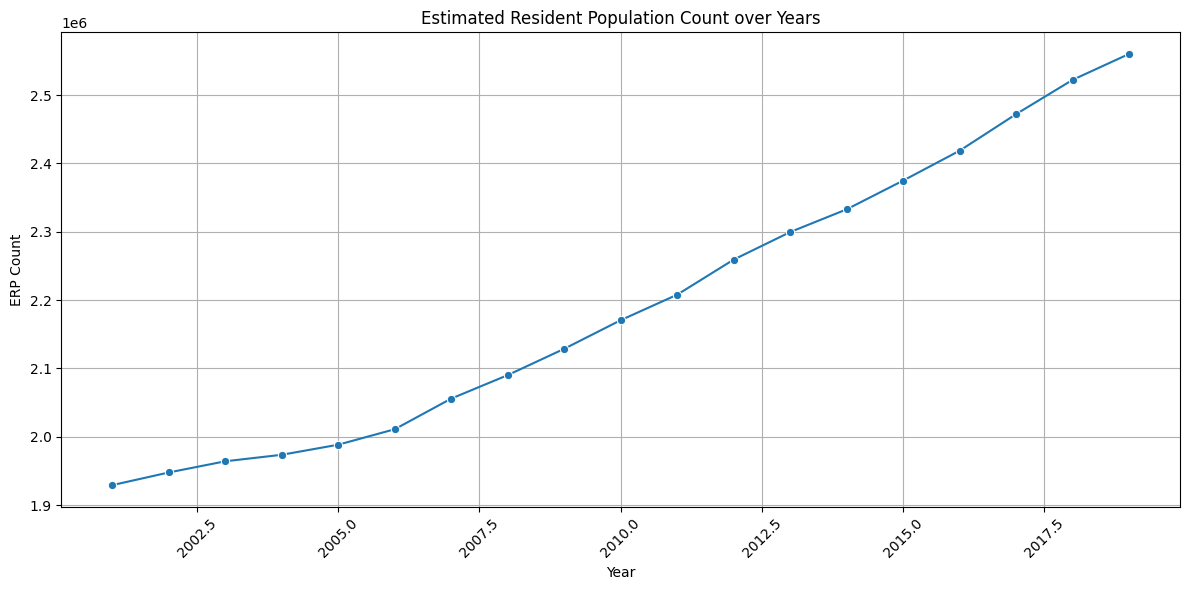

In [ ]:
# Line plot of ERPCount over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='ERPCount', data=df_yearly, marker='o')
plt.title('Estimated Resident Population Count over Years')
plt.xlabel('Year')
plt.ylabel('ERP Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

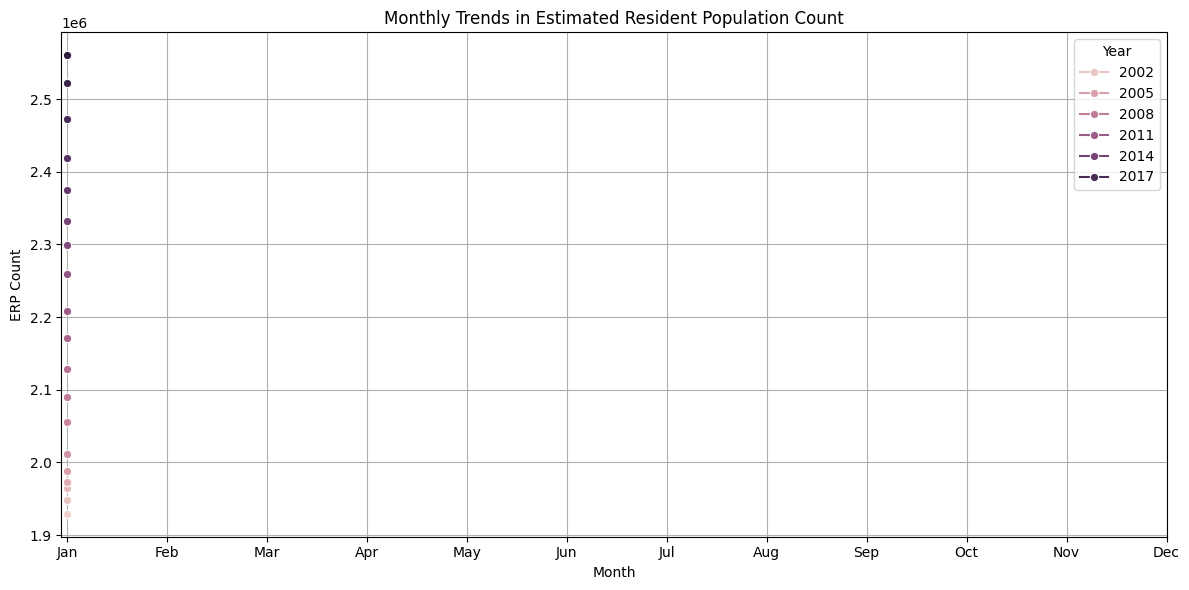

In [ ]:
# Monthly trends in ERPCount
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='ERPCount', hue='Year', data=df_monthly, marker='o')
plt.title('Monthly Trends in Estimated Resident Population Count')
plt.xlabel('Month')
plt.ylabel('ERP Count')
plt.grid(True)
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()

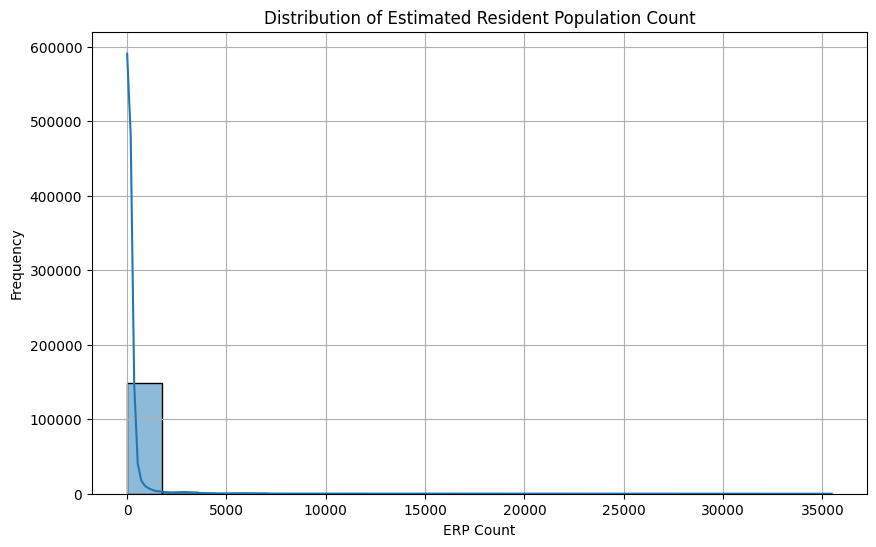

In [ ]:
# Distribution plot of ERPCount
plt.figure(figsize=(10, 6))
sns.histplot(df['ERPCount'], bins=20, kde=True)
plt.title('Distribution of Estimated Resident Population Count')
plt.xlabel('ERP Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

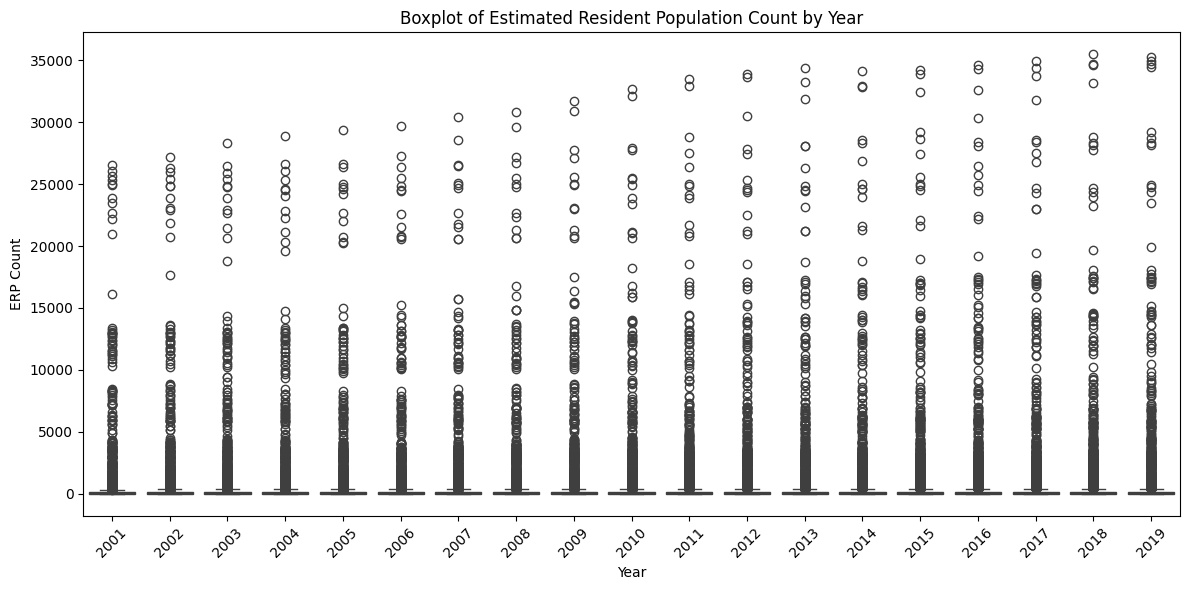

In [ ]:
# Box plot of ERPCount by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='ERPCount', data=df)
plt.title('Boxplot of Estimated Resident Population Count by Year')
plt.xlabel('Year')
plt.ylabel('ERP Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

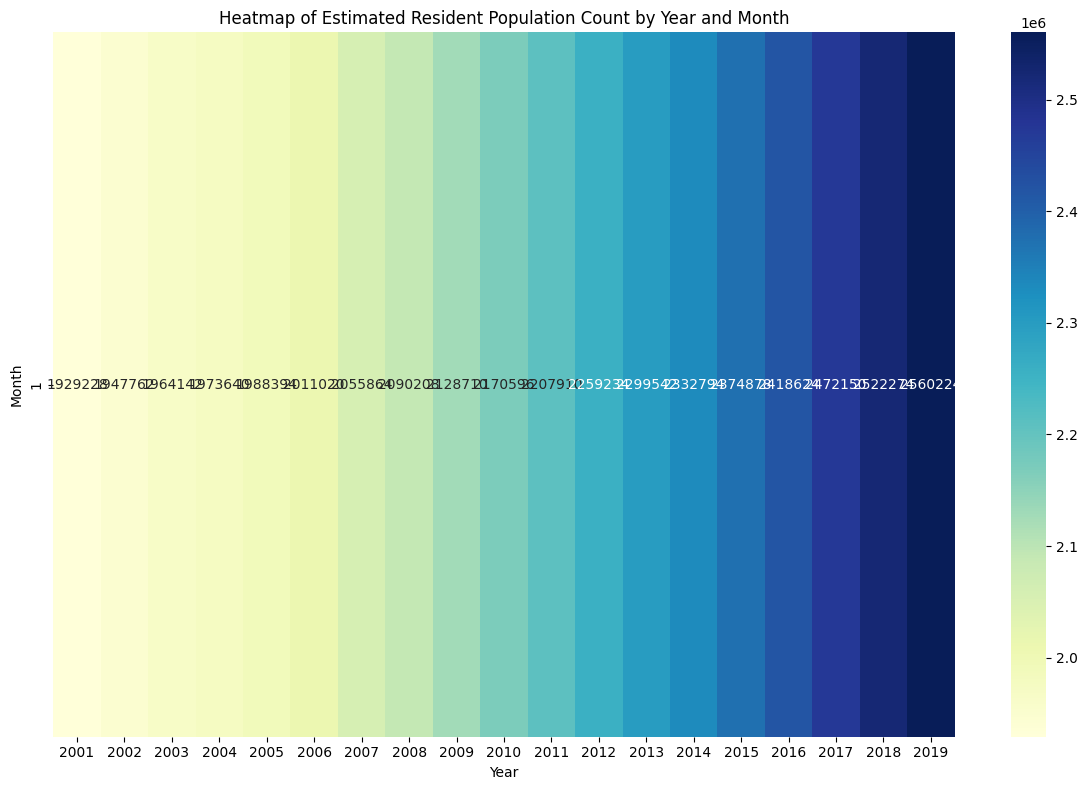

In [ ]:
# Heatmap of ERPCount by year and month
pivot_table = df.pivot_table(values='ERPCount', index='Month', columns='Year', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)
plt.title('Heatmap of Estimated Resident Population Count by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


# Hypothesis testing scenarios


 Example Hypothesis 1: Test if there is a significant difference in ERPCount between 2022 and 2023

In [ ]:
erp_2022 = df[df['Year'] == 2022]['ERPCount']
erp_2023 = df[df['Year'] == 2023]['ERPCount']

In [ ]:
t_statistic, p_value = stats.ttest_ind(erp_2022, erp_2023, equal_var=False)

In [ ]:
print("\nHypothesis 1 Testing:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Hypothesis 1 Testing:
T-statistic: nan
P-value: nan


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in ERPCount between 2022 and 2023")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ERPCount between 2022 and 2023")

Fail to reject null hypothesis: There is no significant difference in ERPCount between 2022 and 2023


Example Hypothesis 2: Test if there is a correlation between ERPCount and Month

In [ ]:
correlation, p_value = stats.pearsonr(df['Month'], df['ERPCount'])

print("\nHypothesis 2 Testing:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)



Hypothesis 2 Testing:
Correlation coefficient: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
if p_value < alpha:
    print("Reject null hypothesis: There is a significant correlation between Month and ERPCount")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between Month and ERPCount")


Fail to reject null hypothesis: There is no significant correlation between Month and ERPCount


 Example Hypothesis 3: Test if ERPCount follows a normal distribution

In [ ]:
normality_stat, p_value = stats.normaltest(df['ERPCount'])

print("\nHypothesis 3 Testing:")
print("Normality test statistic:", normality_stat)
print("P-value:", p_value)



Hypothesis 3 Testing:
Normality test statistic: 275198.38225679664
P-value: 0.0


In [ ]:
if p_value < alpha:
    print("Reject null hypothesis: ERPCount does not follow a normal distribution")
else:
    print("Fail to reject null hypothesis: ERPCount follows a normal distribution")

Reject null hypothesis: ERPCount does not follow a normal distribution


#Data Preparation for Neural Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
df = pd.read_csv('Estimated_resident_population_ACT.csv')


In [ ]:
# Convert 'ERPYear' to datetime format
df['ERPYear'] = pd.to_datetime(df['ERPYear'], format='%Y')

In [ ]:
# Drop unnecessary columns for neural network analysis
df.drop(['SexCode', 'AgeGroup5Code', 'Australian Statistical Geography Standard, Statistical Area',
         'EntityCode', 'EntityName', 'StateCode'], axis=1, inplace=True)

In [ ]:
# Feature engineering: Extract year and month from 'ERPYear'
df['Year'] = df['ERPYear'].dt.year
df['Month'] = df['ERPYear'].dt.month

# Encode categorical variables (if any)
# Since 'Year' and 'Month' are numerical, no further encoding needed


In [ ]:
# Split data into training and testing sets
X = df[['Year', 'Month']].values
y = df['ERPCount'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 # Designing and Training the Neural Network Model

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression task)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/50
3797/3797 [==============================] - 14s 3ms/step - loss: 1910697.5000 - val_loss: 2019707.6250
Epoch 2/50
3797/3797 [==============================] - 14s 4ms/step - loss: 1903711.2500 - val_loss: 2019652.7500
Epoch 3/50
3797/3797 [==============================] - 13s 3ms/step - loss: 1903767.2500 - val_loss: 2019521.0000
Epoch 4/50
3797/3797 [==============================] - 19s 5ms/step - loss: 1903654.2500 - val_loss: 2019521.3750
Epoch 5/50
3797/3797 [==============================] - 17s 5ms/step - loss: 1903513.5000 - val_loss: 2019504.5000
Epoch 6/50
3797/3797 [==============================] - 15s 4ms/step - loss: 1903583.3750 - val_loss: 2019780.8750
Epoch 7/50
3797/3797 [==============================] - 10s 3ms/step - loss: 1903600.5000 - val_loss: 2019558.5000
Epoch 8/50
3797/3797 [==============================] - 9s 2ms/step - loss: 1903714.6250 - val_loss: 2019507.8750
Epoch 9/50
3797/3797 [==============================] - 8s 2ms/step - loss: 19035

# Evaluating the Model

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

950/950 [==============================] - 1s 1ms/step
Mean Squared Error (MSE): 2019504.0961687723


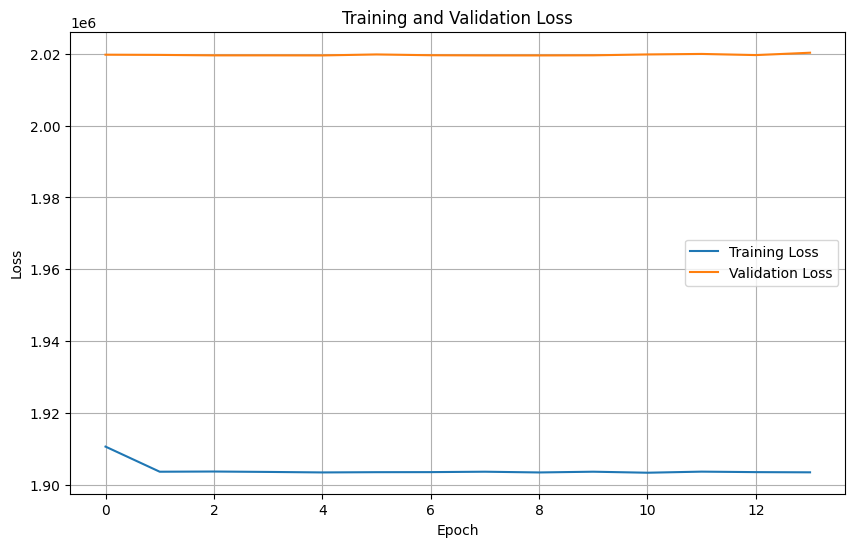

In [ ]:
# Plot training/validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making Predictions

In [ ]:
# Example: Predict ERPCount for future years
future_years = np.array([[2024, 1], [2024, 2], [2024, 3]])  # Example future years and months
future_years_scaled = scaler.transform(future_years)

In [ ]:
predictions = model.predict(future_years_scaled)
print("Predicted ERPCount for 2024 (Jan-Mar):")
for i, pred in enumerate(predictions):
    print(f"Month {i+1}: {pred[0]}")

1/1 [==============================] - 0s 63ms/step
Predicted ERPCount for 2024 (Jan-Mar):
Month 1: 389.787841796875
Month 2: 386.7969970703125
Month 3: 388.31396484375


# Implement LSTM Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Load the dataset
df = pd.read_csv('Estimated_resident_population_ACT.csv')

# Convert 'ERPYear' to datetime format
df['ERPYear'] = pd.to_datetime(df['ERPYear'], format='%Y')


In [ ]:
# Drop unnecessary columns for LSTM analysis
df.drop(['SexCode', 'AgeGroup5Code', 'Australian Statistical Geography Standard, Statistical Area',
         'EntityCode', 'EntityName', 'StateCode'], axis=1, inplace=True)


In [ ]:
# Feature engineering: Extract year and month from 'ERPYear'
df['Year'] = df['ERPYear'].dt.year
df['Month'] = df['ERPYear'].dt.month

In [ ]:
# Prepare sequential data for LSTM
def prepare_data_for_lstm(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)



In [ ]:
# Choose number of time steps (e.g., use the last 12 months to predict the next month)
n_steps = 12

In [ ]:
# Convert DataFrame to supervised learning format
data = df[['Year', 'Month', 'ERPCount']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
# Prepare data for LSTM
X, y = prepare_data_for_lstm(scaled_data, n_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check the shapes of X and y
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121468, 12, 2)
y_train shape: (121468,)
X_test shape: (30368, 12, 2)
y_test shape: (30368,)


# Designing and Training LSTM Model

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=15, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/15
3796/3796 [==============================] - 60s 15ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 2/15
3796/3796 [==============================] - 53s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/15
3796/3796 [==============================] - 54s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/15
3796/3796 [==============================] - 52s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/15
3796/3796 [==============================] - 53s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/15
3796/3796 [==============================] - 56s 15ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/15
3796/3796 [==============================] - 50s 13ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/15
3796/3796 [==============================] - 51s 13ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/15
3796/3796 [==============================] - 57s 15ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/15
3796/3796 [==============================] - 51s 14m

# Evaluating the LSTM Model

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(np.hstack((X_test[:, -1, :-1], y_pred.reshape(-1, 1))))
y_test_inv = scaler.inverse_transform(np.hstack((X_test[:, -1, :-1], y_test.reshape(-1, 1))))

949/949 [==============================] - 4s 4ms/step


ValueError: operands could not be broadcast together with shapes (30368,2) (3,) (30368,2) 

In [ ]:
mse = mean_squared_error(y_test_inv[:, -1], y_pred_inv[:, -1])
print(f"Mean Squared Error (MSE): {mse}")

NameError: name 'y_test_inv' is not defined

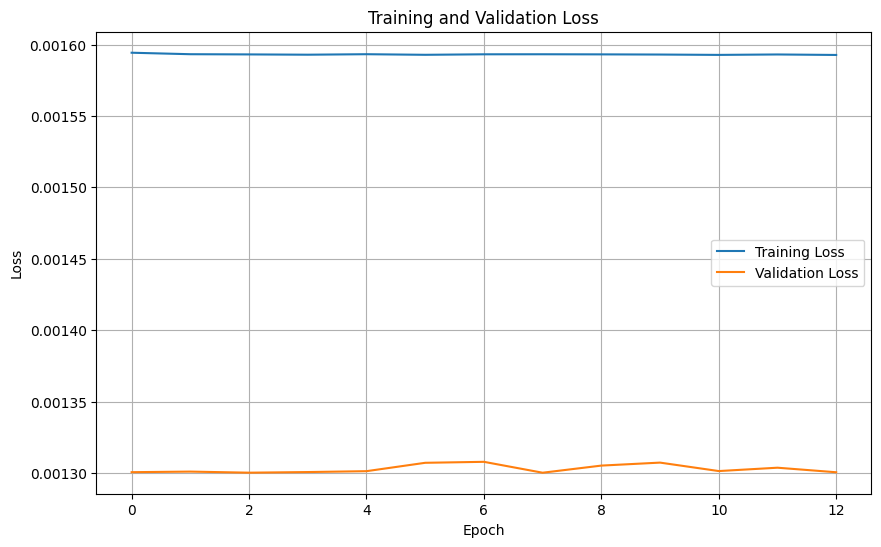

In [ ]:
# Plot training/validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Making Predictions with LSTM Model

In [ ]:
# Example: Predict ERPCount for future months in 2024
# Create sequences for future predictions
last_months_data = df[['Year', 'Month', 'ERPCount']].tail(n_steps).values
future_months = np.zeros((12, n_steps, 3))  # Predicting next 12 months

In [ ]:
for i in range(12):
    if i == 0:
        future_months[i] = last_months_data
    else:
        next_data = np.hstack((future_months[i-1, 1:, :], np.array([[2024, i+1, 0]])))  # Replace 0 with predicted ERPCount
        future_months[i] = np.vstack((future_months[i-1, 1:, :], next_data))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 11 and the array at index 1 has size 1

In [ ]:
future_months_scaled = scaler.transform(future_months.reshape(-1, 3)).reshape(12, n_steps, 3)

In [ ]:
# Make predictions
predictions = model.predict(future_months_scaled)

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/lstm_2/while/lstm_cell/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-81-d60e578e05b4>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/base_rnn.py", line 556, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 626, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5168, in rnn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5147, in _step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 624, in step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 327, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 2463, in dot

Matrix size-incompatible: In[0]: [12,3], In[1]: [2,200]
	 [[{{node sequential_2/lstm_2/while/lstm_cell/MatMul}}]] [Op:__inference_predict_function_567085]

In [ ]:
# Inverse transform predictions
predictions_inv = scaler.inverse_transform(np.hstack((future_months_scaled[:, -1, :-1], predictions.reshape(-1, 1))))

In [ ]:
print("Predicted ERPCount for 2024 (Jan-Dec):")
for i, pred in enumerate(predictions_inv):
    print(f"Month {i+1}: {pred[-1]}")





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
df = pd.read_csv('Estimated_resident_population_ACT.csv')

# Convert 'ERPYear' to datetime format
df['ERPYear'] = pd.to_datetime(df['ERPYear'], format='%Y')

# Drop unnecessary columns for ML algorithms
df.drop(['SexCode', 'AgeGroup5Code', 'Australian Statistical Geography Standard, Statistical Area',
         'EntityCode', 'EntityName', 'StateCode'], axis=1, inplace=True)

In [ ]:
# Feature engineering: Extract year and month from 'ERPYear'
df['Year'] = df['ERPYear'].dt.year
df['Month'] = df['ERPYear'].dt.month

# Choose features and target
X = df[['Year', 'Month']].values
y = df['ERPCount'].values

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data (if necessary for specific algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check the shapes of X and y
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121478, 2)
y_train shape: (121478,)
X_test shape: (30370, 2)
y_test shape: (30370,)


# Applying Standard ML Algorithms

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")


Linear Regression - Mean Squared Error (MSE): 2019419.8510356976


In [ ]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Calculate MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt}")


Decision Tree - Mean Squared Error (MSE): 2020024.6486409744


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")


Random Forest - Mean Squared Error (MSE): 2020073.510850904


In [ ]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Calculate MSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")


Gradient Boosting - Mean Squared Error (MSE): 2020008.484997091


In [ ]:
# Print MSE for all models
print("\nMean Squared Errors:")
print(f"Linear Regression: {mse_lr}")
print(f"Decision Tree: {mse_dt}")
print(f"Random Forest: {mse_rf}")
print(f"Gradient Boosting: {mse_gb}")



Mean Squared Errors:
Linear Regression: 2019419.8510356976
Decision Tree: 2020024.6486409744
Random Forest: 2020073.510850904
Gradient Boosting: 2020008.484997091


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming Random Forest was identified as the best model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [ ]:
import numpy as np

# Create a list of future months in 2024 (assuming we want predictions for all 12 months)
future_months = np.array([[2024, i+1] for i in range(12)])

# Predict ERPCount for future months
predictions = rf.predict(future_months)

# Print predicted ERPCount for each month in 2024
print("Predicted ERPCount for 2024 (Jan-Dec):")
for i, pred in enumerate(predictions):
    print(f"Month {i+1}: {pred}")


Predicted ERPCount for 2024 (Jan-Dec):
Month 1: 318.7747121298166
Month 2: 318.7747121298166
Month 3: 318.7747121298166
Month 4: 318.7747121298166
Month 5: 318.7747121298166
Month 6: 318.7747121298166
Month 7: 318.7747121298166
Month 8: 318.7747121298166
Month 9: 318.7747121298166
Month 10: 318.7747121298166
Month 11: 318.7747121298166
Month 12: 318.7747121298166
